# CLUSTERING

In [ ]:
# KMeans : En yakın komşu kümelemesi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("cars.xls")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
x=df[['Price','Mileage','Cylinder']]

In [6]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [7]:
model=KMeans(4)

In [8]:
model=model.fit(x)

In [9]:
tahmin=model.predict(x)

In [10]:
tahmin

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2,
       2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

In [11]:
x['cluster']=tahmin

In [12]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,2


In [13]:
silhouette_score(x,tahmin)

0.4127931968678176

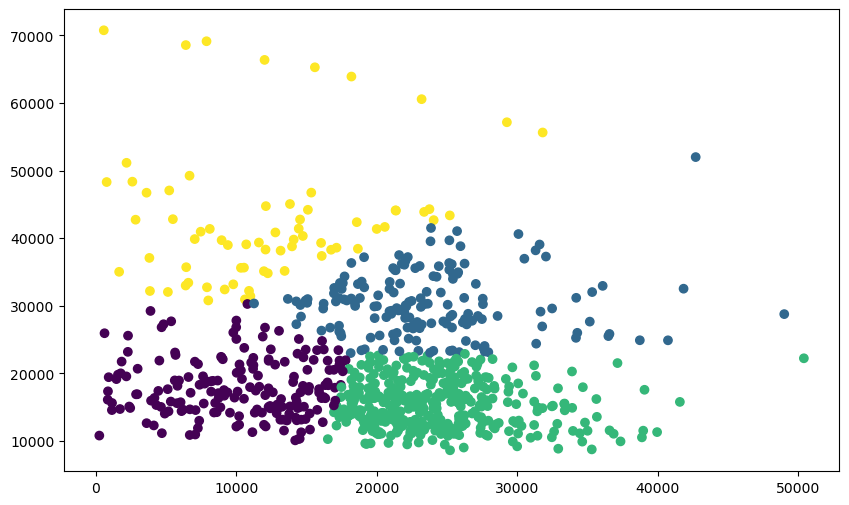

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=tahmin)

In [20]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [21]:
clust(10)

Cluster  2  score:  0.4511454164700083
Cluster  3  score:  0.41321086862343287
Cluster  4  score:  0.4145589020753052
Cluster  5  score:  0.3546590290866912
Cluster  6  score:  0.36067144746486995
Cluster  7  score:  0.358828878611525
Cluster  8  score:  0.3633142209642288
Cluster  9  score:  0.3495263672223962
Cluster  10  score:  0.35451286813004435


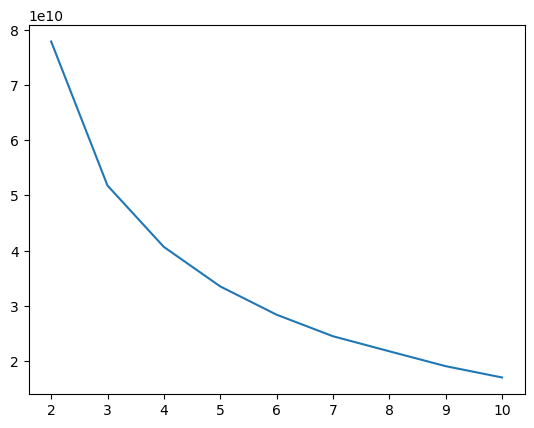

In [22]:
plt.plot(allcluster,distances)

# Hierarchical Clustering

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
link_data=linkage(x,method='ward', metric='euclidean')

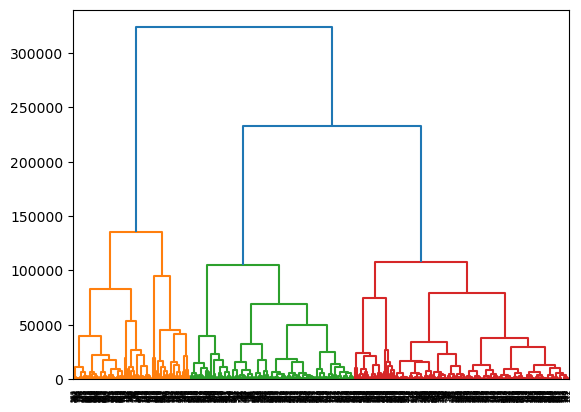

In [26]:
dendrogram(link_data)
plt.show()

In [27]:
from sklearn.cluster import DBSCAN

In [30]:
clusters=DBSCAN(eps=2.5,min_samples=4).fit(x)

In [31]:
set(clusters.labels_)

{-1}